## Financial Big Data Project : Impact of Louvain clustering on GMVP strategy

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from data_cleaning import load_trade
from refreshTime import harmoniz_data,refresh_time
from back_test import daily_back_testing,impor_data
import seaborn as sns

Date = pd.bdate_range('2010-01-01','2010-12-31')[1:]
Market_name = np.array(['AAPL.OQ','AMGN.OQ','AXP.N','BA.N','CAT.N','CSCO.OQ','CVX.N','DOW.N','GS.N','SPY.P','UTX.N','V.N','WMT.N'])

#folder_path = 'D:/GitHub/ML_For_Finance/big data/data/data/'

folder_path ='D:/GitHub/ML for Finance project/ML_For_Finance/big data/Data/data/'
#folder_path = '/Users/franckatteaka/Desktop/cours/Semester III/Financial big data/high freq data/'

## Section 2 : Data Analysis

In [ ]:
n=len(Date)
m=len(Market_name)
market_size = np.zeros((n,m))

for i in range(n):
    temp = impor_data(Market_name,Date[i],folder_path)
    for j in range(m):
        market_size[i,j]=len(temp[j])


In [ ]:
plt.figure(figsize=(13,10))
for j in range(m):
    plt.plot(Date,market_size[:,j],label=Market_name[j])
    
plt.legend()
plt.ylabel("number of trades")
plt.xlabel('Date')
plt.title('Evolution of trades number')
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
        
plt.gcf().autofmt_xdate()
plt.savefig('figures/number_trades.pdf')

## Section 3 : Data synchronisation

In [ ]:
n=len(Date)
m=len(Market_name)
tau = np.zeros((n))

for i in range(n):
    temp1 = impor_data(Market_name,Date[i],folder_path)
    temp2 = refresh_time(temp1)
    tau[i]=len(temp2)

In [ ]:
plt.figure(figsize=(13,10))

plt.plot(Date,tau)
    
plt.legend()
plt.ylabel("number of refresh time")
plt.xlabel('Date')
plt.title('Evolution of refresh time number')
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
        
plt.gcf().autofmt_xdate()
plt.savefig('figures/number_refresh_time.pdf')

## Section 4 Louvain and GMVP performance

In [12]:
nday_init=0
nday_end=150
backtesting1=daily_back_testing(Market_name,folder_path,Date[nday_init])
l=nday_end-nday_init
for i in range(nday_init+1,nday_end+1):
    backtesting1.daily_update(Date[i])
    print('avancement : %f '%((i-nday_init)/l))

In [ ]:
backtesting1.plot_value()

In [ ]:
diff_return = np.array(backtesting1.louvain_return)-np.array(backtesting1.vanilla_return)
plt.boxplot(diff_return)
plt.title('difference of return between louvain and vanilla stragies')
plt.savefig('figures/boxplot difference between louvain and vanilla strategies.pdf')
plt.show()

In [ ]:
n=len(backtesting1.louvain_return)
temp=[backtesting1.louvain_return[i]==backtesting1.vanilla_return[i] for i in range(n)]
print('number of time where the number of louvain cluster is 1 :', sum(temp))
print('rate of time where the number of louvain cluster is 1 :', sum(temp)/n)

In [34]:
print('std of louvain return : ',np.mean(backtesting1.louvain_return))
print('std of vanilla return : ',np.mean(backtesting1.vanilla_return))

std of louvain return :  0.0021961743766144605
std of vanilla return :  0.002196965167872483


In [33]:
print('std of louvain return : ',np.std(backtesting1.louvain_return))
print('std of vanilla return : ',np.std(backtesting1.vanilla_return))

std of louvain return :  0.00533642184761429
std of vanilla return :  0.005335488262408742


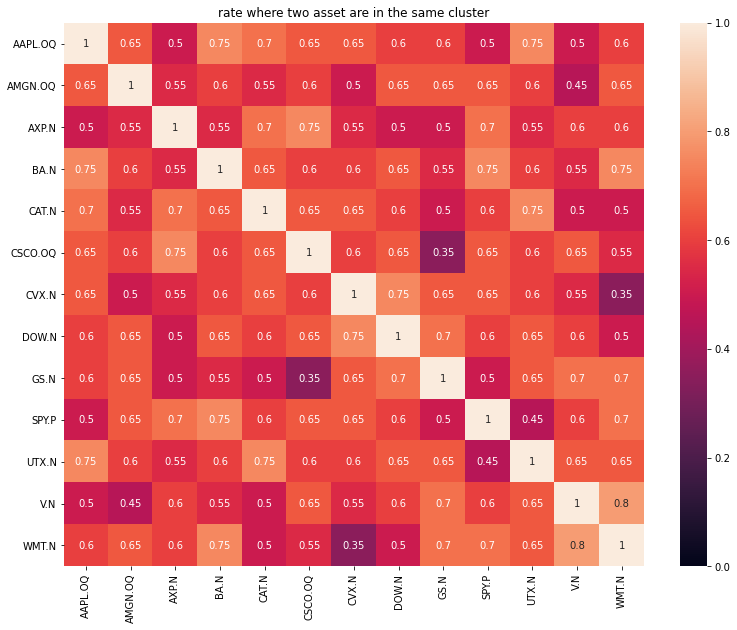

In [40]:
plt.figure(figsize=(13,10))
sns.heatmap(backtesting1.louvain_cluster/backtesting1.nombre_test,vmin=0, vmax=1,annot=True)
plt.title('rate where two asset are in the same cluster')
plt.savefig('figures/rate_two_assets_in_the_same_cluster.pdf')

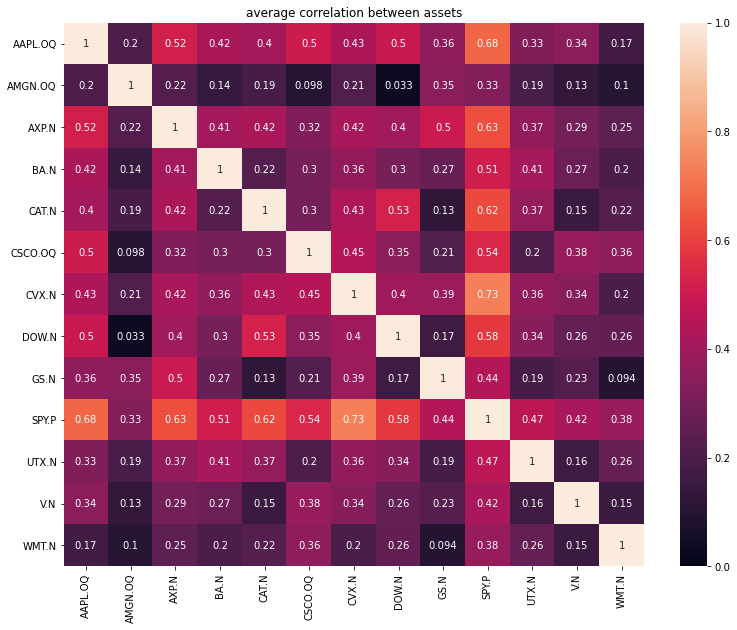

In [38]:
plt.figure(figsize=(13,10))
sns.heatmap(backtesting1.correlation/backtesting1.nombre_test,vmin=-1, vmax=1,annot=True)
plt.title('average correlation between assets')
plt.savefig('figures/correlation_heatmap.pdf')